# PERSIAPAN DATA

In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# Load Statistics package
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

## 1. Data Pengajuan

In [83]:
# Import dataset
df_pengajuan = pd.read_csv('application_record.csv')
df_pengajuan.T

,0,1,2,3,4,5,6,7,8,9,...,438547,438548,438549,438550,438551,438552,438553,438554,438555,438556
ID,5008804,5008805,5008806,5008808,5008809,5008810,5008811,5008812,5008813,5008814,...,6839917,6839936,6840098,6840100,6840102,6840104,6840222,6841878,6842765,6842885
CODE_GENDER,M,M,M,F,F,F,F,F,F,F,...,F,M,F,F,F,M,F,F,F,F
FLAG_OWN_CAR,Y,Y,Y,N,N,N,N,N,N,N,...,N,Y,N,N,N,N,N,N,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,Y,Y,Y,Y,N,N,Y,Y
CNT_CHILDREN,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
AMT_INCOME_TOTAL,427500.0,427500.0,112500.0,270000.0,270000.0,270000.0,270000.0,283500.0,283500.0,283500.0,...,180000.0,135000.0,135000.0,135000.0,135000.0,135000.0,103500.0,54000.0,72000.0,121500.0
NAME_INCOME_TYPE,Working,Working,Working,Commercial associate,Commercial associate,Commercial associate,Commercial associate,Pensioner,Pensioner,Pensioner,...,Pensioner,Working,Pensioner,Pensioner,Pensioner,Pensioner,Working,Commercial associate,Pensioner,Working
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Higher education,Higher education,Higher education,...,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Higher education,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Single / not married,Single / not married,Single / not married,Single / not married,Separated,Separated,Separated,...,Married,Married,Separated,Separated,Separated,Separated,Single / not married,Single / not married,Married,Married
NAME_HOUSING_TYPE,Rented apartment,Rented apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,...,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,With parents,House / apartment,House / apartment


In [3]:
# Cek jumlah data
df_pengajuan.shape

(438557, 18)

In [4]:
# Buang data nasabah double
df_pengajuan.drop_duplicates(subset = 'ID', keep = False, inplace = True)
df_pengajuan.shape

(438463, 18)

## 2. Data Histori Kredit

In [84]:
# Import dataset
df_kredit = pd.read_csv('credit_record.csv')
df_kredit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [6]:
# Cek jumlah data
df_kredit.shape

(1048575, 3)

In [7]:
# Cek jumlah distinct nasabah
len(set(df_kredit['ID']))

45985

In [8]:
# Cek jumlah nasabah yang ada di kedua dataset (pengajuan dan histori kredit)
ID_beririsan = set(df_pengajuan['ID']).intersection(set(df_kredit['ID']))
len(ID_beririsan)

36457

## 2.1. Mendefinisikan Bad Loan

In [9]:
df_kredit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


Penjelasan variabel:

- ID : Nomor unik nasabah.
- MONTHS_BALANCE : Bulan data diambil
- MONTHS_BALANCE = 0 adalah bulan ini,
- MONTHS_BALANCE = -1 adalah bulan lalu.
- STATUS : Status kredit.
  - 0 : 1-29 hari menunggak
  - 1 : 30-59 hari menunggak
  - 2 : 60-89 hari menunggak
  - 3 : 90-119 hari menunggak
  - 4 : 120-149 hari menunggak
  - 5 : hapusbuku atau lebih dari 150 hari menunggak
  - C : sudah dibayar di bulan itu
  - X : tidak ada kredit di bulan itu

In [10]:
# Mendefinisikan status kredit
dibawah_30 = df_kredit['STATUS'] == '0'
diatas_30 = df_kredit['STATUS'] == '1'
diatas_60 = df_kredit['STATUS'] == '2'
diatas_90 = df_kredit['STATUS'] == '3'
diatas_120 = df_kredit['STATUS'] == '4'
hapus_buku = df_kredit['STATUS'] == '5'
sudah_dibayar = df_kredit['STATUS'] == 'C'
tidak_ada_kredit = df_kredit['STATUS'] == 'X'

Asumsi bad loan adalah menunggak di atas 90 hari.

In [11]:
# Mendefinisikan bad loan
df_kredit['is_badloan'] = np.where(diatas_90|diatas_120|hapus_buku, 1, 0)

df_kredit

,ID,MONTHS_BALANCE,STATUS,is_badloan
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,0
1048571,5150487,-26,C,0
1048572,5150487,-27,C,0
1048573,5150487,-28,C,0


## 2.2. Membuat Tabel Cohort

In [12]:
# Buat pivot table data histori kredit
df_kredit_pivot = df_kredit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
df_kredit

,ID,MONTHS_BALANCE,STATUS,is_badloan
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,0
1048571,5150487,-26,C,0
1048572,5150487,-27,C,0
1048573,5150487,-28,C,0


In [13]:
# Data histori kredit group by nasabah
df_kredit_ID = df_kredit.groupby('ID')

# Define the open month = when the credit is activated/payout
df_kredit_pivot['bulan_pembukaan'] = df_kredit_ID['MONTHS_BALANCE'].min()

df_kredit_pivot

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-8,-7,-6,-5,-4,-3,-2,-1,0,bulan_pembukaan
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,X,-3
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,-18
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,-21
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,-14
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28
5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,-17
5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,C,-12


In [14]:
# End month = last record of the credit performance
df_kredit_pivot['bulan_terakhir'] = df_kredit_ID['MONTHS_BALANCE'].max()

# Calculate the performance window
df_kredit_pivot['lama_kredit'] = df_kredit_pivot['bulan_terakhir'] - df_kredit_pivot['bulan_pembukaan']

# Display the pivot
df_kredit_pivot

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-6,-5,-4,-3,-2,-1,0,bulan_pembukaan,bulan_terakhir,lama_kredit
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,X,-3,0,3
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,-18,0,18
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,-21,0,21
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,-14,0,14
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,-59,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28,-11,17
5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,-17,0,17
5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,C,-12,0,12


In [15]:
# Menampilkan hanya kolom-kolom yang digunakan
df_kredit_pivot['ID'] = df_kredit_pivot.index
df_kredit_pivot.reset_index(drop = True, inplace = True)
df_kredit_pivot = df_kredit_pivot[['ID', 'bulan_pembukaan', 'bulan_terakhir', 'lama_kredit']]
df_kredit_pivot

MONTHS_BALANCE,ID,bulan_pembukaan,bulan_terakhir,lama_kredit
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


## 3. Data Gabungan

In [16]:
# Merge the information of open month, end month, and window of each ID into performance data
df_kredit_histori = pd.merge(left = df_kredit, right = df_kredit_pivot, how = 'left', on = 'ID')
df_kredit_histori

,ID,MONTHS_BALANCE,STATUS,is_badloan,bulan_pembukaan,bulan_terakhir,lama_kredit
0,5001711,0,X,0,-3,0,3
1,5001711,-1,0,0,-3,0,3
2,5001711,-2,0,0,-3,0,3
3,5001711,-3,0,0,-3,0,3
4,5001712,0,C,0,-18,0,18
...,...,...,...,...,...,...,...
1048570,5150487,-25,C,0,-29,0,29
1048571,5150487,-26,C,0,-29,0,29
1048572,5150487,-27,C,0,-29,0,29
1048573,5150487,-28,C,0,-29,0,29


In [17]:
# Hitung bulan di pembukuan
df_kredit_histori['bulan_buku'] = df_kredit_histori['MONTHS_BALANCE'] - df_kredit_histori['bulan_pembukaan']
df_kredit_histori

,ID,MONTHS_BALANCE,STATUS,is_badloan,bulan_pembukaan,bulan_terakhir,lama_kredit,bulan_buku
0,5001711,0,X,0,-3,0,3,3
1,5001711,-1,0,0,-3,0,3,2
2,5001711,-2,0,0,-3,0,3,1
3,5001711,-3,0,0,-3,0,3,0
4,5001712,0,C,0,-18,0,18,18
...,...,...,...,...,...,...,...,...
1048570,5150487,-25,C,0,-29,0,29,4
1048571,5150487,-26,C,0,-29,0,29,3
1048572,5150487,-27,C,0,-29,0,29,2
1048573,5150487,-28,C,0,-29,0,29,1


## 3.1. Hitung Histori Bad Loan

In [18]:
# Pivot table group by bulan pembukaan
df_kredit_pivot_bulanbuka = df_kredit_pivot.groupby(['bulan_pembukaan'])

# Hitung distinct nasabah tiap bulan pembukaan
df_total_nasabah = df_kredit_pivot_bulanbuka.agg({'ID': ['count']})

# Reset index dan rename kolom
df_total_nasabah.reset_index(inplace = True)
df_total_nasabah.columns = ['bulan_pembukaan','total_nasabah']

df_total_nasabah

,bulan_pembukaan,total_nasabah
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [19]:
# Sanity check
df_total_nasabah['total_nasabah'].sum()

45985

In [20]:
# Hitung total nasabah untuk cohort table
cohort = df_kredit_histori.groupby(['bulan_pembukaan','bulan_buku']).agg({'ID': ['count']})

# Reset index dan rename kolom
cohort.reset_index(inplace = True)
cohort.columns = ['bulan_pembukaan', 'bulan_buku', 'total_nasabah_per_bulan_buku']

cohort

,bulan_pembukaan,bulan_buku,total_nasabah_per_bulan_buku
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [21]:
# Sanity check
cohort[cohort['bulan_buku'] == 0]['total_nasabah_per_bulan_buku'].sum()

45985

In [22]:
# Cek tabel pivot untuk bulan pembukaan = -60
df_kredit_pivot[df_kredit_pivot['bulan_pembukaan'] == -60]

MONTHS_BALANCE,ID,bulan_pembukaan,bulan_terakhir,lama_kredit
15,5001730,-60,0,60
346,5002160,-60,0,60
351,5002165,-60,0,60
355,5002171,-60,0,60
444,5002283,-60,0,60
...,...,...,...,...
44745,5148718,-60,-1,59
44827,5148819,-60,0,60
45016,5149057,-60,-27,33
45240,5149355,-60,-21,39


In [23]:
# Hanya menggunakan kolom yg diperlukan
cohort = cohort[['bulan_pembukaan','bulan_buku']]

# Merge tabel total nasabah dan cohort
cohort = pd.merge(left = cohort,
                  right = df_total_nasabah,
                  how = 'left',
                  on = ['bulan_pembukaan'])

# Menambahkan kolom jumlah bad loan
cohort['total_bad'] = np.nan

cohort

,bulan_pembukaan,bulan_buku,total_nasabah,total_bad
0,-60,0,415,NaN
1,-60,1,415,NaN
2,-60,2,415,NaN
3,-60,3,415,NaN
4,-60,4,415,NaN
...,...,...,...,...
1886,-2,1,771,NaN
1887,-2,2,771,NaN
1888,-1,0,686,NaN
1889,-1,1,686,NaN


In [24]:
# Hanya menggunakan data >= -48 (pembukaan kredit 4 tahun terakhir)
max_buka = -48
max_lama_kredit = -(max_buka)

# Mendefinisikan cohort baru
cohort_dup = cohort.copy()
cohort = cohort[cohort['bulan_pembukaan'] >= max_buka]

cohort

,bulan_pembukaan,bulan_buku,total_nasabah,total_bad
666,-48,0,581,NaN
667,-48,1,581,NaN
668,-48,2,581,NaN
669,-48,3,581,NaN
670,-48,4,581,NaN
...,...,...,...,...
1886,-2,1,771,NaN
1887,-2,2,771,NaN
1888,-1,0,686,NaN
1889,-1,1,686,NaN


In [25]:
# Menghitung total_bad tiap bulan_buku di tiap bulan_pembukaan
for bulanbuka in range(max_buka, 1):

  # List untuk menyimpan bad account
  bad_list = []

  # Define bad loan, month_on_book, and open_month
  bad = df_kredit_histori['is_badloan']
  bulan_buku = df_kredit_histori['bulan_buku']
  bulan_pembukaan = df_kredit_histori['bulan_pembukaan']

  for bulanbuku in range(0, max_lama_kredit+1):

    # Mendefinisikan bad account
    bad_ID = list(df_kredit_histori[(bad == 1) & (bulan_buku == bulanbuku) & (bulan_pembukaan == bulanbuka)]['ID'])

    # Menyimpan bad account di bad_list
    bad_list.extend(bad_ID)

    # Menghitung total_bad ID di tiap bulan_buku
    bad_counts = len(set(bad_list))

    # Menyimpan total_bad ID di cohort table
    cohort.loc[(cohort['bulan_buku'] == bulanbuku) & (cohort['bulan_pembukaan'] == bulanbuka), 'total_bad'] = bad_counts

# Menghitung kolom bad_rate di cohort table
cohort['bad_rate']  = cohort['total_bad'] / cohort['total_nasabah']

cohort

C:\Users\KRISTALINA\AppData\Local\Temp\ipykernel_15656\1674846592.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort['bad_rate']  = cohort['total_bad'] / cohort['total_nasabah']


,bulan_pembukaan,bulan_buku,total_nasabah,total_bad,bad_rate
666,-48,0,581,0.0,0.000000
667,-48,1,581,0.0,0.000000
668,-48,2,581,0.0,0.000000
669,-48,3,581,0.0,0.000000
670,-48,4,581,1.0,0.001721
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,0.0,0.000000
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


In [26]:
# Pivot cohort table
cohort_pivot = cohort.pivot(index = 'bulan_pembukaan',
                            columns = 'bulan_buku',
                            values = 'bad_rate')

cohort_pivot

bulan_buku,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
bulan_pembukaan,,,,,,,,,,,,,,,,,,,,,
-48,0.00000,0.000000,0.000000,0.000000,0.001721,0.003442,0.006885,0.006885,0.008606,0.010327,...,0.017212,0.017212,0.017212,0.017212,0.017212,0.017212,0.017212,0.017212,0.017212,0.017212
-47,0.00000,0.000000,0.000000,0.000000,0.001637,0.001637,0.001637,0.001637,0.003273,0.004910,...,0.011457,0.011457,0.011457,0.011457,0.011457,0.011457,0.011457,0.011457,0.011457,NaN
-46,0.00000,0.000000,0.000000,0.001739,0.001739,0.003478,0.005217,0.008696,0.010435,0.010435,...,0.015652,0.015652,0.015652,0.015652,0.015652,0.015652,0.015652,0.015652,NaN,NaN
-45,0.00000,0.000000,0.000000,0.000000,0.000000,0.001653,0.003306,0.003306,0.003306,0.004959,...,0.004959,0.004959,0.004959,0.004959,0.004959,0.004959,0.004959,NaN,NaN,NaN
-44,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003384,0.005076,0.005076,...,0.010152,0.010152,0.010152,0.010152,0.010152,0.010152,NaN,NaN,NaN,NaN
-43,0.00000,0.001541,0.001541,0.001541,0.001541,0.001541,0.001541,0.001541,0.003082,0.003082,...,0.007704,0.007704,0.007704,0.007704,0.007704,NaN,NaN,NaN,NaN,NaN
-42,0.00000,0.000000,0.000000,0.000000,0.000000,0.001425,0.001425,0.001425,0.001425,0.002849,...,0.009972,0.009972,0.009972,0.009972,NaN,NaN,NaN,NaN,NaN,NaN
-41,0.00000,0.000000,0.000000,0.000000,0.000000,0.004304,0.004304,0.004304,0.005739,0.007174,...,0.010043,0.010043,0.010043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-40,0.00000,0.000000,0.000000,0.001357,0.001357,0.001357,0.001357,0.002714,0.002714,0.005427,...,0.017639,0.017639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


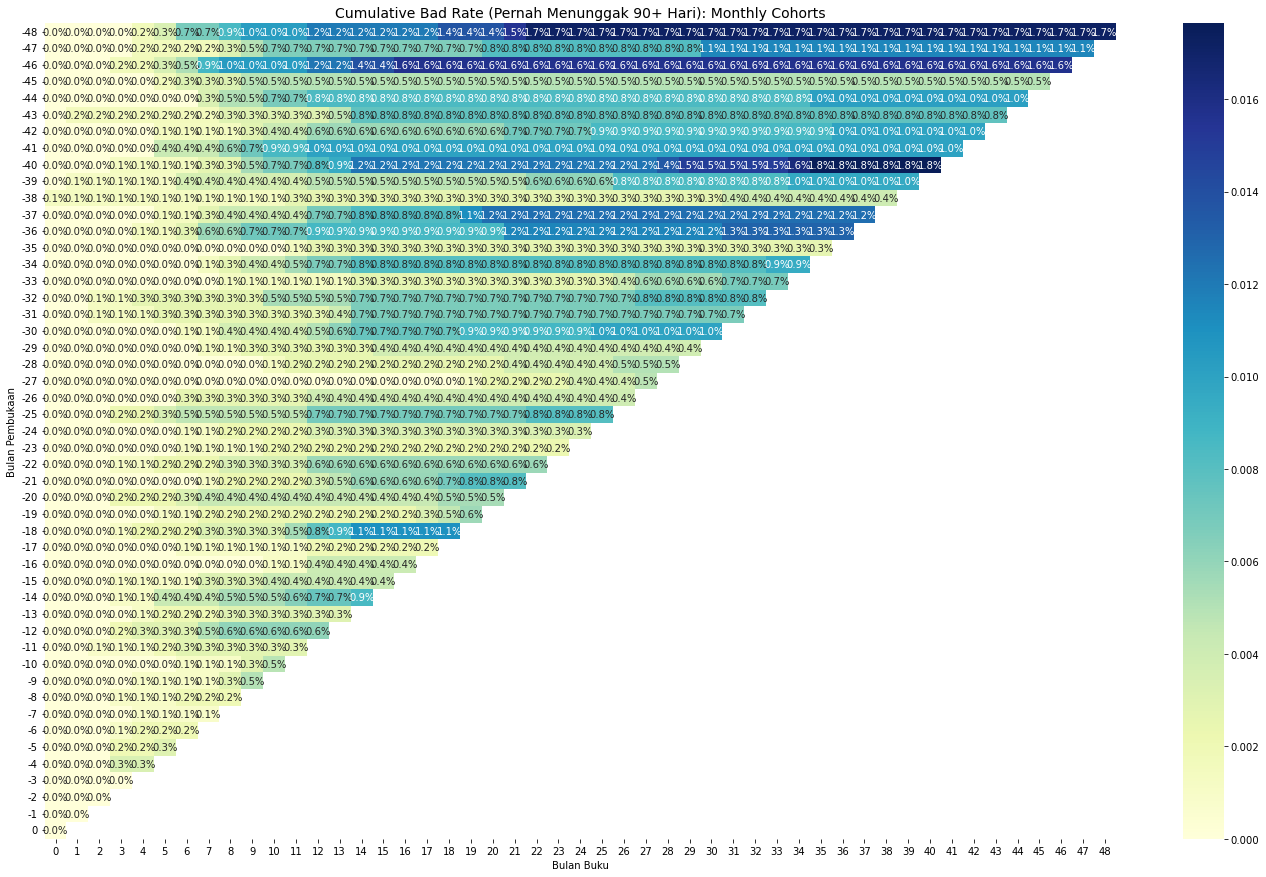

In [27]:
# Visualisasi cohort di heat map
plt.figure(figsize = (24,15))

plt.title('Cumulative Bad Rate (Pernah Menunggak 90+ Hari): Monthly Cohorts',
          fontsize = 14)

# Buat heatmap
sns.heatmap(data = cohort_pivot,
            annot = True,
            fmt = '.1%',
            cmap = 'YlGnBu')

plt.ylabel('Bulan Pembukaan')
plt.xlabel('Bulan Buku')
plt.yticks(rotation = 'horizontal')
plt.show()

## 3.2. Mendefinisikan Performance dan Sample Windows

#### 1. Ambil data bad rate diagonal (data terkini)

In [28]:
# Transform pivot table ke df
window_list = []
for i in range(max_buka, 1):
  window_list.append(i)

cohort_table = cohort_pivot.loc[window_list]
cohort_table

bulan_buku,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
bulan_pembukaan,,,,,,,,,,,,,,,,,,,,,
-48,0.00000,0.000000,0.000000,0.000000,0.001721,0.003442,0.006885,0.006885,0.008606,0.010327,...,0.017212,0.017212,0.017212,0.017212,0.017212,0.017212,0.017212,0.017212,0.017212,0.017212
-47,0.00000,0.000000,0.000000,0.000000,0.001637,0.001637,0.001637,0.001637,0.003273,0.004910,...,0.011457,0.011457,0.011457,0.011457,0.011457,0.011457,0.011457,0.011457,0.011457,NaN
-46,0.00000,0.000000,0.000000,0.001739,0.001739,0.003478,0.005217,0.008696,0.010435,0.010435,...,0.015652,0.015652,0.015652,0.015652,0.015652,0.015652,0.015652,0.015652,NaN,NaN
-45,0.00000,0.000000,0.000000,0.000000,0.000000,0.001653,0.003306,0.003306,0.003306,0.004959,...,0.004959,0.004959,0.004959,0.004959,0.004959,0.004959,0.004959,NaN,NaN,NaN
-44,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003384,0.005076,0.005076,...,0.010152,0.010152,0.010152,0.010152,0.010152,0.010152,NaN,NaN,NaN,NaN
-43,0.00000,0.001541,0.001541,0.001541,0.001541,0.001541,0.001541,0.001541,0.003082,0.003082,...,0.007704,0.007704,0.007704,0.007704,0.007704,NaN,NaN,NaN,NaN,NaN
-42,0.00000,0.000000,0.000000,0.000000,0.000000,0.001425,0.001425,0.001425,0.001425,0.002849,...,0.009972,0.009972,0.009972,0.009972,NaN,NaN,NaN,NaN,NaN,NaN
-41,0.00000,0.000000,0.000000,0.000000,0.000000,0.004304,0.004304,0.004304,0.005739,0.007174,...,0.010043,0.010043,0.010043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-40,0.00000,0.000000,0.000000,0.001357,0.001357,0.001357,0.001357,0.002714,0.002714,0.005427,...,0.017639,0.017639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Membuat list data diagonal
diagonal = []

# Mengambil data bad rate dan menyimpan ke list
for booking in range(0, max_lama_kredit+1):
  diag_bad_rate = cohort_table[booking][-booking]
  diagonal.append(diag_bad_rate)

# Tampilkan
diagonal = pd.DataFrame(diagonal)
diagonal.T

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.0,0.0,0.0,0.0,0.003432,0.003077,0.001951,0.000892,0.001946,0.00497,...,0.009627,0.017639,0.010043,0.009972,0.007704,0.010152,0.004959,0.015652,0.011457,0.017212


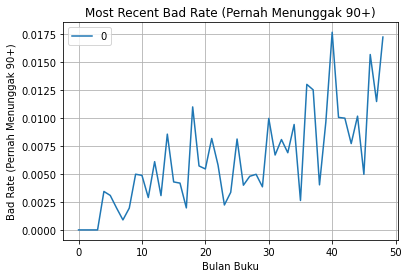

In [30]:
# Plot bad rate kumulatif dari single cohorts
diagonal.plot(title = 'Most Recent Bad Rate (Pernah Menunggak 90+)',
                     kind = 'line',
                     grid = True,
                     legend = True)

plt.xlabel('Bulan Buku')
plt.ylabel('Bad Rate (Pernah Menunggak 90+)')
plt.show()

#### 2. Memilih single cohort

---

Menganalisis 4 dari 36 single cohorts:
- Pembukaan kredit 48 bulan yang lalu
- Pembukaan kredit 46 bulan yang lalu
- Pembukaan kredit 40 bulan yang lalu 
- Pembukaan kredit 36 bulan yang lalu 

In [31]:
# Mendefinisikan single cohort
list_of_booking = [-48,-46,-40,-36]

# Simpan dalam dataframe
cohort_sliced = cohort_pivot.loc[list_of_booking]

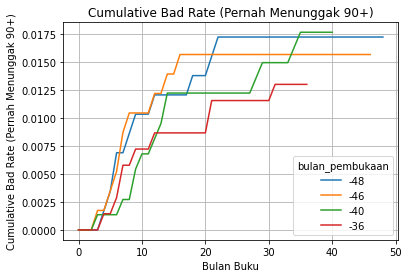

In [32]:
# Plot bad rate kumulatif dari single cohorts
cohort_sliced.T.plot(title = 'Cumulative Bad Rate (Pernah Menunggak 90+)',
                     kind = 'line',
                     grid = True,
                     legend = True)

plt.xlabel('Bulan Buku')
plt.ylabel('Cumulative Bad Rate (Pernah Menunggak 90+)')
plt.show()

In [33]:
# Define min and max of open_month
max_open = -48
min_open = -46

# Define min and max of sample window
min_window = df_kredit_histori['bulan_pembukaan'] <= min_open
max_window = df_kredit_histori['bulan_pembukaan'] >= max_open

# Define sample window
sample_window = df_kredit_histori[(min_window) & (max_window)]

sample_window

,ID,MONTHS_BALANCE,STATUS,is_badloan,bulan_pembukaan,bulan_terakhir,lama_kredit,bulan_buku
671,5001742,0,C,0,-46,0,46,46
672,5001742,-1,C,0,-46,0,46,45
673,5001742,-2,C,0,-46,0,46,44
674,5001742,-3,C,0,-46,0,46,43
675,5001742,-4,C,0,-46,0,46,42
...,...,...,...,...,...,...,...,...
1047655,5150401,-44,X,0,-48,0,48,4
1047656,5150401,-45,X,0,-48,0,48,3
1047657,5150401,-46,X,0,-48,0,48,2
1047658,5150401,-47,X,0,-48,0,48,1


## 3.3. Assign Target/Response Variable

In [34]:
# Define bad status in each ID
bad_table = sample_window.groupby(['ID', 'bulan_pembukaan']).agg({'is_badloan': ['sum']})

# Reset index and rename the column
bad_table.reset_index(inplace = True)
bad_table.columns = ['ID','bulan_pembukaan','BAD']

bad_table[bad_table['BAD'] > 0]

,ID,bulan_pembukaan,BAD
53,5003471,-47,1
399,5023781,-46,2
406,5023963,-47,1
678,5047783,-47,1
699,5048301,-48,3
803,5060454,-46,40
820,5061021,-46,1
825,5061132,-46,2
829,5061360,-46,26
854,5062136,-48,3


In [35]:
# Assign bad status as target or response variable
# BAD=0 for those who never overdue 90+
bad_table['BAD'] = bad_table['BAD'].apply(lambda x: 0 if x==0 else 1)

bad_table[bad_table['BAD'] > 0]

,ID,bulan_pembukaan,BAD
53,5003471,-47,1
399,5023781,-46,1
406,5023963,-47,1
678,5047783,-47,1
699,5048301,-48,1
803,5060454,-46,1
820,5061021,-46,1
825,5061132,-46,1
829,5061360,-46,1
854,5062136,-48,1


In [36]:
# Check the data shape
bad_table.shape

(1767, 3)

In [37]:
# Check the proportion of bad status
bad_table['BAD'].value_counts(normalize = True)

0    0.985286
1    0.014714
Name: BAD, dtype: float64

## 3.4. Merge Target and Application Data

In [38]:
# Merge target and application data
data = pd.merge(left = df_pengajuan,
                right = bad_table,
                how = 'left',
                on = 'ID')

# Display the merged tables
data.T

,0,1,2,3,4,5,6,7,8,9,...,438453,438454,438455,438456,438457,438458,438459,438460,438461,438462
ID,5008804,5008805,5008806,5008808,5008809,5008810,5008811,5008812,5008813,5008814,...,6839917,6839936,6840098,6840100,6840102,6840104,6840222,6841878,6842765,6842885
CODE_GENDER,M,M,M,F,F,F,F,F,F,F,...,F,M,F,F,F,M,F,F,F,F
FLAG_OWN_CAR,Y,Y,Y,N,N,N,N,N,N,N,...,N,Y,N,N,N,N,N,N,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,Y,Y,Y,Y,N,N,Y,Y
CNT_CHILDREN,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
AMT_INCOME_TOTAL,427500.0,427500.0,112500.0,270000.0,270000.0,270000.0,270000.0,283500.0,283500.0,283500.0,...,180000.0,135000.0,135000.0,135000.0,135000.0,135000.0,103500.0,54000.0,72000.0,121500.0
NAME_INCOME_TYPE,Working,Working,Working,Commercial associate,Commercial associate,Commercial associate,Commercial associate,Pensioner,Pensioner,Pensioner,...,Pensioner,Working,Pensioner,Pensioner,Pensioner,Pensioner,Working,Commercial associate,Pensioner,Working
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Higher education,Higher education,Higher education,...,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Higher education,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Single / not married,Single / not married,Single / not married,Single / not married,Separated,Separated,Separated,...,Married,Married,Separated,Separated,Separated,Separated,Single / not married,Single / not married,Married,Married
NAME_HOUSING_TYPE,Rented apartment,Rented apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,...,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,With parents,House / apartment,House / apartment


## 4. Data Cleaning

In [39]:
# Check for missing values
data.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134177
CNT_FAM_MEMBERS             0
bulan_pembukaan        437076
BAD                    437076
dtype: int64

In [40]:
# Drop missing values in target 'BAD'
data = data.dropna(subset = 'BAD')

# Sanity check
data.isna().sum()

ID                       0
CODE_GENDER              0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
DAYS_BIRTH               0
DAYS_EMPLOYED            0
FLAG_MOBIL               0
FLAG_WORK_PHONE          0
FLAG_PHONE               0
FLAG_EMAIL               0
OCCUPATION_TYPE        414
CNT_FAM_MEMBERS          0
bulan_pembukaan          0
BAD                      0
dtype: int64

In [41]:
# Cek code gender
data['CODE_GENDER'].value_counts()

F    915
M    472
Name: CODE_GENDER, dtype: int64

In [42]:
# Ganti jadi binary
data['CODE_GENDER'] = data['CODE_GENDER'].replace('M', 1)
data['CODE_GENDER'] = data['CODE_GENDER'].replace('F', 0)

In [43]:
# Cek flag_own_car
data['FLAG_OWN_CAR'].value_counts()

N    822
Y    565
Name: FLAG_OWN_CAR, dtype: int64

In [44]:
# Ganti jadi binary
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].replace('Y', 1)
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].replace('N', 0)

In [45]:
data['FLAG_OWN_REALTY'].value_counts()

Y    929
N    458
Name: FLAG_OWN_REALTY, dtype: int64

In [46]:
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].replace('Y', 1)
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].replace('N', 0)

In [47]:
# Cek name income type
data['NAME_INCOME_TYPE'].value_counts()

Working                 737
Commercial associate    319
Pensioner               211
State servant           120
Name: NAME_INCOME_TYPE, dtype: int64

In [48]:
# Cek name education type
data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    930
Higher education                 399
Incomplete higher                 47
Lower secondary                   10
Academic degree                    1
Name: NAME_EDUCATION_TYPE, dtype: int64

In [86]:
# Label the categories of 'education type'
label = {'Lower secondary' : 1,
         'Secondary / secondary special' : 2,
         'Incomplete higher' : 3,
         'Higher education' : 4,
         'Academic degree' : 5
        }

data['FLAG_EDUCATION'] = data['NAME_EDUCATION_TYPE'].map(label)
data['FLAG_EDUCATION'].value_counts()

2    930
4    399
3     47
1     10
5      1
Name: FLAG_EDUCATION, dtype: int64

In [50]:
# Cek name family status
data['NAME_FAMILY_STATUS'].value_counts()

Married                 999
Single / not married    153
Civil marriage           98
Widow                    71
Separated                66
Name: NAME_FAMILY_STATUS, dtype: int64

In [51]:
# Cek name housing type
data['NAME_HOUSING_TYPE'].value_counts()

House / apartment      1247
With parents             58
Municipal apartment      49
Rented apartment         15
Co-op apartment          13
Office apartment          5
Name: NAME_HOUSING_TYPE, dtype: int64

In [52]:
# Cek occupation type
data['OCCUPATION_TYPE'].value_counts()

Laborers                 259
Managers                 140
Sales staff              133
Core staff               125
Drivers                   78
High skill tech staff     51
Accountants               47
Medicine staff            37
Cooking staff             29
Security staff            27
Private service staff     14
Cleaning staff            13
IT staff                   6
Secretaries                6
Waiters/barmen staff       2
HR staff                   2
Realty agents              2
Low-skill Laborers         2
Name: OCCUPATION_TYPE, dtype: int64

In [53]:
# Check the data shape
data.shape

(1387, 21)

In [54]:
# Define response variable
response_variable = 'BAD'

# Check the proportion of response variable
data[response_variable].value_counts(normalize = True)

0.0    0.983417
1.0    0.016583
Name: BAD, dtype: float64

# DATA EXPLORATION & MODELLING

## **1. Sample Splitting**

In [55]:
# Split response and predictors
y = data[response_variable]
X = data.drop(columns = [response_variable],
              axis = 1)

# Validate the splitting
print('y shape :', y.shape)
print('X shape :', X.shape)

y shape : (1387,)
X shape : (1387, 20)


In [56]:
from sklearn.model_selection import train_test_split

# Split the data
data_train, data_test = train_test_split(data,
                                         stratify = data[response_variable],
                                         test_size = 0.2,
                                         random_state = 99)

# Validate splitting
print('data train shape :', data_train.shape)
print('data test shape  :', data_test.shape)

data train shape : (1109, 21)
data test shape  : (278, 21)


In [57]:
data_train[response_variable].value_counts(normalize = True)

0.0    0.983769
1.0    0.016231
Name: BAD, dtype: float64

In [58]:
data_test[response_variable].value_counts(normalize = True)

0.0    0.982014
1.0    0.017986
Name: BAD, dtype: float64

## **2. Exploratory Data Analysis**

In [59]:
# Check for data type
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109 entries, 7054 to 2139
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1109 non-null   int64  
 1   CODE_GENDER          1109 non-null   int64  
 2   FLAG_OWN_CAR         1109 non-null   int64  
 3   FLAG_OWN_REALTY      1109 non-null   int64  
 4   CNT_CHILDREN         1109 non-null   int64  
 5   AMT_INCOME_TOTAL     1109 non-null   float64
 6   NAME_INCOME_TYPE     1109 non-null   object 
 7   NAME_EDUCATION_TYPE  1109 non-null   object 
 8   NAME_FAMILY_STATUS   1109 non-null   object 
 9   NAME_HOUSING_TYPE    1109 non-null   object 
 10  DAYS_BIRTH           1109 non-null   int64  
 11  DAYS_EMPLOYED        1109 non-null   int64  
 12  FLAG_MOBIL           1109 non-null   int64  
 13  FLAG_WORK_PHONE      1109 non-null   int64  
 14  FLAG_PHONE           1109 non-null   int64  
 15  FLAG_EMAIL           1109 non-null 

In [87]:
# Calculate the age from the DAYS_BIRTH
data_train['AGE'] = -(data_train['DAYS_BIRTH'] // 365)


#deskripsi data numerik
data_train[['AGE', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN']].describe()

,AGE,AMT_INCOME_TOTAL,CNT_CHILDREN
count,1109.000000,1109.000000,1109.000000
mean,44.761046,189774.848061,0.439134
std,10.869412,94502.875017,0.725466
min,26.000000,31531.500000,0.000000
25%,36.000000,135000.000000,0.000000
50%,44.000000,180000.000000,0.000000
75%,54.000000,225000.000000,1.000000
max,69.000000,900000.000000,5.000000


**Explore predictor AMT_INCOME_TOTAL**

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

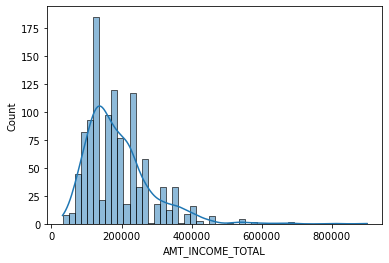

In [61]:
# Distribution plot of 'AMT_INCOME_TOTAL'
sns.histplot(data = data_train,
             x = 'AMT_INCOME_TOTAL',
             kde = True)

In [63]:
# Descriptive of 'AMT_INCOME_TOTAL' by response variable
data_train['AMT_INCOME_TOTAL'].groupby(data_train[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
BAD,,,,,,,,
0.0,1091.0,190169.162695,95008.173277,31531.5,132750.0,180000.0,225000.0,900000.0
1.0,18.0,165875.000000,51975.690726,65250.0,135000.0,180000.0,202500.0,238500.0


<AxesSubplot:xlabel='BAD', ylabel='AMT_INCOME_TOTAL'>

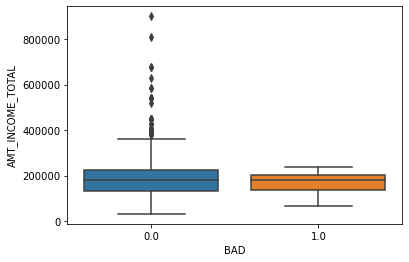

In [64]:
# Boxplot of 'AMT_INCOME_TOTAL' by response variable
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'AMT_INCOME_TOTAL')

**Explore predictor AGE**

<AxesSubplot:xlabel='AGE', ylabel='Count'>

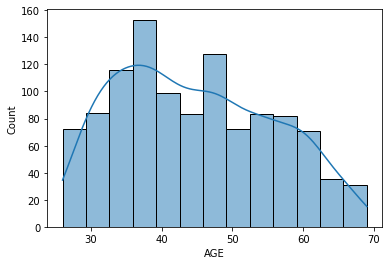

In [65]:
# Distribution plot of 'AGE'
sns.histplot(data = data_train,
             x = 'AGE',
             kde = True)

In [66]:
# Descriptive of 'AGE' by response variable
data_train['AGE'].groupby(data_train[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
BAD,,,,,,,,
0.0,1091.0,44.762603,10.85955,26.0,36.00,44.0,53.50,69.0
1.0,18.0,44.666667,11.78234,27.0,33.75,42.5,56.75,61.0


<AxesSubplot:xlabel='BAD', ylabel='AGE'>

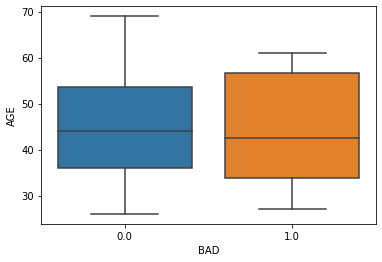

In [67]:
# Boxplot of 'AGE' by response variable
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'AGE')

## 2.1. Check Correlation

In [68]:
# Define data with numerical predictors
data_train_num = data_train[['CNT_CHILDREN',
                       'AMT_INCOME_TOTAL',
                       'DAYS_BIRTH',
                       'DAYS_EMPLOYED',
                       'CNT_FAM_MEMBERS',
                       'AGE']]

# Calculate Pearson correlation coefficient from numerical predictors
data_train_corr = data_train_num.corr(method = 'pearson')

data_train_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AGE
CNT_CHILDREN,1.000000,0.030890,0.395044,-0.238966,0.892257,-0.395402
AMT_INCOME_TOTAL,0.030890,1.000000,0.084592,-0.222653,0.063560,-0.083556
DAYS_BIRTH,0.395044,0.084592,1.000000,-0.608593,0.370346,-0.999662
DAYS_EMPLOYED,-0.238966,-0.222653,-0.608593,1.000000,-0.246694,0.608850
CNT_FAM_MEMBERS,0.892257,0.063560,0.370346,-0.246694,1.000000,-0.370551
AGE,-0.395402,-0.083556,-0.999662,0.608850,-0.370551,1.000000


<AxesSubplot:>

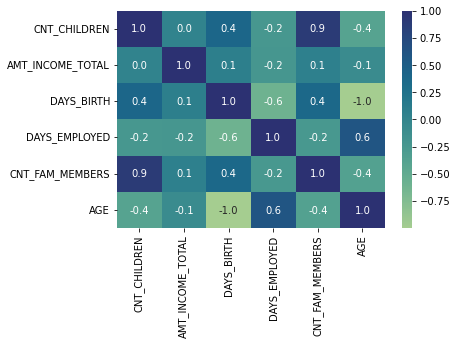

In [69]:
# Plot the heatmap correlation
sns.heatmap(data = data_train_corr,
            cmap = 'crest',
            annot = True,
            fmt = '.1f')

Pilih satu antara CNT_FAM_MEMBERS atau CNT_CHILDREN (pilih CNT_CHILDREN).
Pilih satu antara DAYS_BIRTH atau AGE (pilih AGE).

# MODELLING

In [70]:
data_train.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,bulan_pembukaan,BAD,FLAG_EDUCATION,AGE
7054,5026628,0,0,1,0,99000.0,Working,Secondary / secondary special,Separated,House / apartment,...,1,0,0,0,Medicine staff,1.0,-46.0,0.0,2,50
4660,5024081,0,0,1,2,112500.0,Working,Secondary / secondary special,Separated,House / apartment,...,1,0,0,0,Sales staff,3.0,-48.0,0.0,2,40
33254,5096526,0,0,0,0,135000.0,Working,Secondary / secondary special,Widow,Co-op apartment,...,1,0,0,0,Core staff,1.0,-47.0,0.0,2,55
46822,5142839,1,0,0,0,180000.0,Commercial associate,Incomplete higher,Married,House / apartment,...,1,0,0,0,NaN,2.0,-48.0,0.0,3,31
46335,5142274,0,0,0,1,99000.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,NaN,3.0,-48.0,0.0,2,43


In [72]:
y_train = data_train['BAD']
x_train = data_train[['AMT_INCOME_TOTAL', 'AGE', 'FLAG_EDUCATION', 'CNT_CHILDREN', 'CODE_GENDER']]

In [73]:
# Modeling with statsmodels

# Add constant to predictor
x_sm = sm.add_constant(x_train)

# Model fitting
model_multi_cont = sm.Logit(endog = y_train,
                            exog = x_sm)
result_multi_cont = model_multi_cont.fit()

# Print the result
print(result_multi_cont.summary())

Optimization terminated successfully.
         Current function value: 0.073460
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 1109
Model:                          Logit   Df Residuals:                     1103
Method:                           MLE   Df Model:                            5
Date:                Sun, 05 Nov 2023   Pseudo R-squ.:                  0.1148
Time:                        14:01:50   Log-Likelihood:                -81.467
converged:                       True   LL-Null:                       -92.028
Covariance Type:            nonrobust   LLR p-value:                 0.0007679
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.6289      1.546     -3.641      0.000      -8.659      -2.599
AMT_INCOME_

- Thus, we have the logit model:
$$
\begin{align*}
\text{logit} &=\beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} \\
&=\beta_{0} + \beta_{1}(\text{AMT_INCOME_TOTAL}) + \beta_{2}(\text{AGE}) + \beta_{3}(\text{FLAG_EDUCATION}) + \beta_{4}(\text{CNT_CHILDREN}) + \beta_{5}(\text{CODE_GENDER}) \\
\text{logit} &= -5.6289 - (6.577e-06)(\text{AMT_INCOME_TOTAL}) - 0.0079(\text{AGE}) + 1.0746(\text{FLAG_EDUCATION}) - 0.7194(\text{CNT_CHILDREN}) + 0.1043(\text{CODE_GENDER})\\
\end{align*}
$$

Extract $\beta_{0}$ estimate.

In [74]:
# Print the parameter estimate of b0
b0_multi_cont = result_multi_cont.params[0]
b0_multi_cont

-5.628890896267558

Extract $\beta_{1}$ estimate.

In [76]:
# Print the parameter estimate of b1
b1_multi_cont = result_multi_cont.params[1]
b1_multi_cont

-6.577365345116017e-06

Extract $\beta_{2}$ estimate.

In [77]:
# Print the parameter estimate of b2
b2_multi_cont = result_multi_cont.params[2]
b2_multi_cont

-0.007929871773017174

Extract $\beta_{3}$ estimate.

In [79]:
# Print the parameter estimate of b3
b3_multi_cont = result_multi_cont.params[3]
b3_multi_cont

1.0745638760065577

Extract $\beta_{4}$ estimate.

In [80]:
# Print the parameter estimate of b4
b4_multi_cont = result_multi_cont.params[4]
b4_multi_cont

-0.7193519210854262

Extract $\beta_{5}$ estimate.

In [81]:
# Print the parameter estimate of b5
b5_multi_cont = result_multi_cont.params[5]
b5_multi_cont

0.10430941203457043

**Interpretation**

Interpretation for $\beta_{1}$ and $\beta_{2}$.

In [82]:
# Calculate the OR of default
odds_ratio_multi_cont_b1 = np.exp(b1_multi_cont)
odds_ratio_multi_cont_b2 = np.exp(b2_multi_cont)
odds_ratio_multi_cont_b3 = np.exp(b3_multi_cont)
odds_ratio_multi_cont_b4 = np.exp(b4_multi_cont)
odds_ratio_multi_cont_b5 = np.exp(b5_multi_cont)

print(f"OR b1 = {odds_ratio_multi_cont_b1:.2f}")
print(f"OR b2 = {odds_ratio_multi_cont_b2:.2f}")
print(f"OR b3 = {odds_ratio_multi_cont_b2:.2f}")
print(f"OR b4 = {odds_ratio_multi_cont_b2:.2f}")
print(f"OR b5 = {odds_ratio_multi_cont_b2:.2f}")

OR b1 = 1.00
OR b2 = 0.99
OR b3 = 0.99
OR b4 = 0.99
OR b5 = 0.99
